# Revision for exams

## Solutions of previous years assignments 2022-2023

### Unit 1

**Problem 7**

Using Sagemath find the reduced row echelon form and the rank of the matrices
(a) The 3 by 4 matrix with all entries equal to 4.
(b) The 3 by 4 matrix A with entries Aij = i + j − 1.
(c) The 3 by 4 matrix A with entries Aij = (−1)j

(a)

In [172]:
%display latex

A = matrix(QQ, [[4,4,4,4], [4,4,4,4], [4,4,4,4]]); A

[4 4 4 4]
[4 4 4 4]
[4 4 4 4]

In [173]:
A.rref()

[1 1 1 1]
[0 0 0 0]
[0 0 0 0]

In [174]:
rank(A)

1

(b)

In [175]:
A = matrix(QQ, 3, 4, lambda i, j: ((i + 1) + (j + 1) - 1)); A

[1 2 3 4]
[2 3 4 5]
[3 4 5 6]

In [176]:
A.rref()

[ 1  0 -1 -2]
[ 0  1  2  3]
[ 0  0  0  0]

In [177]:
rank(A)

2

(c)

In [178]:
A = matrix(QQ, 3, 4, lambda i, j: (-1)^(j+1)); A

[-1  1 -1  1]
[-1  1 -1  1]
[-1  1 -1  1]

In [179]:
A.rref()

[ 1 -1  1 -1]
[ 0  0  0  0]
[ 0  0  0  0]

In [180]:
rank(A)

1

**Problem 8**

Solve the following system using Sagemath\
    p + 2q + 3r + s = 1\
    2p + q + 8r + 2s = 2\
    p + 6q − 3r + 5s = −2\
    2p − q + r − s = λ\
in the case λ = 0\
(a) directly solving the system;\
(b) utilising the inverse of a matrix;\
(c) using Gauss elimination;\
and (d) for general λ, using one of methods mentioned above.

In [181]:
p, q, r, s, λ = var('p, q, r, s, λ')

(a)

In [182]:
eqs0 = [p+2*q+3*r+s == 1, 
        2*p+q+8*r+2*s == 2,
        p+6*q-3*r+5*s == -2,
        2*p-q+r-s == 0]

solve(eqs0, [p, q, r, s])

[[p == (-18/65), q == (17/65), r == (51/130), s == (-11/26)]]

(b)

In [183]:
A = matrix(QQ,[[1, 2, 3, 1], [2, 1, 8, 2], [1, 6, -3, 5], [2, -1, 1, -1]])
Y = matrix(QQ, 4, 1, [1, 2, -2, 0])

A, Y

(
[ 1  2  3  1]  [ 1]
[ 2  1  8  2]  [ 2]
[ 1  6 -3  5]  [-2]
[ 2 -1  1 -1], [ 0]
)

In [184]:
A^(-1)*Y

[-18/65]
[ 17/65]
[51/130]
[-11/26]

(c)

In [185]:
AA = A.augment(Y, subdivide = true); AA

[ 1  2  3  1| 1]
[ 2  1  8  2| 2]
[ 1  6 -3  5|-2]
[ 2 -1  1 -1| 0]

In [186]:
AA.echelon_form()

[     1      0      0      0|-18/65]
[     0      1      0      0| 17/65]
[     0      0      1      0|51/130]
[     0      0      0      1|-11/26]

(d)

In [187]:
eqs = [p+2*q+3*r+s == 1,
       2*p+q+8*r+2*s == 2,
       p+6*q-3*r+5*s == -2,
       2*p-q+r-s == λ]

solve(eqs, [p,q,r,s])

[[p == 31/65*λ - 18/65, q == -4/65*λ + 17/65, r == -6/65*λ + 51/130, s == -1/13*λ - 11/26]]

### Unit 2

**Problem 7**

Solution:

(a)

In [188]:
%display latex

m = matrix(QQ, [[1,1,2], [1,-1,0], [1,0,4]])
g, s = m.gram_schmidt();
A, B, C = g; A, B, C

((1, 1, 2), (1, -1, 0), (-1, -1, 1))

(b)

In [189]:
aa = A/norm(A); bb = B/norm(B); cc = C/norm(C);
aa, bb, cc

((1/6*sqrt(6), 1/6*sqrt(6), 1/3*sqrt(6)),
 (1/2*sqrt(2), -1/2*sqrt(2), 0),
 (-1/3*sqrt(3), -1/3*sqrt(3), 1/3*sqrt(3)))

(c)

In [190]:
d = vector(QQ, [1,1,1])
(d.dot_product(aa), d.dot_product(bb), d.dot_product(cc))

(2/3*sqrt(6), 0, -1/3*sqrt(3))

**Problem 8**

Using Sagemath\
(a) define a function that rotates a two dimensional vector by an angle θ given in degrees;\
(b) use this function to successively rotate the vector ⃗a = (1, 1) by 30◦ and then by 45◦ and define vectors\
⃗a1 and ⃗a2 respectively;\
(c) plot the vectors ⃗a, ⃗a1, ⃗a2 using different colors;\
(d) compute the angle (in degrees) between ⃗a and ⃗a2

(a)

In [191]:
th = var('th')
ppi = n(pi)/180.
rot(th) = matrix(SR, [[cos(th*ppi), -sin(th*ppi)], [sin(th*ppi), cos(th*ppi)]])
a = vector(RR, [1., 1.])

a1 = rot(30)*a
a2 = rot(45)*a1

a1, a2

((0.366025403784439, 1.36602540378444), (-0.707106781186547, 1.22474487139159))

(c)

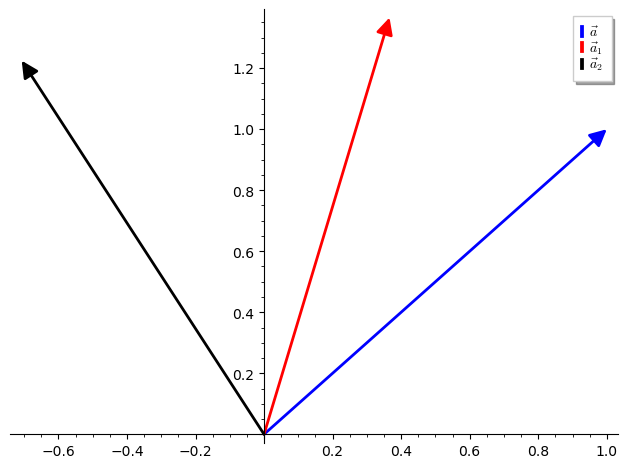

In [192]:
arrow2d((0, 0), a, legend_label = '$\\vec{a}$', legend_color = 'black') + \
    arrow2d((0, 0), a1, legend_label = '$\\vec{a}_1$', legend_color = 'black', color = 'red') + \
        arrow2d((0, 0), a2, legend_label = '$\\vec{a}_2$', legend_color = 'black', color = 'black')

In [193]:
arccos(a.dot_product(a2)/norm(a)/norm(a2))/ppi

75.0000000000000

### Unit 3

**Problem 7**

Using Sagemath
(a) (i) create a random 5 × 5 symmetric positive definite matrix A, (ii) set A11 = p, A22 = q where p, q
the last two digits of your ID number∗ (your e-mail is of the form std????pq@ac.eap.gr) , (iii) check if
the resulting matrix is positive definite and if not repeat steps (i)-(iii) until you get a symmetric positive
definite matrix A;
(b) compute the Cholesky decomposition of A and find a matrix C such as A = CC T ;
(c) compute the singular value decomposition of C, C = U ΣV T ;
(d) define X = U ΣU T and check the relation A = X 2 .
∗
In case some of these digits equals zero, please replace it with the digit 1.

(a)

In [194]:
m = random_matrix(RDF, 5); m

[ 0.021556762277350483   -0.3709722234777306  -0.07644572107329761    0.1735889177297194   0.02488606245910252]
[  0.10202987431794552   -0.8922882747917011    0.4065089081158886   -0.8445870191472165   -0.5947147263928563]
[ 0.008006822055163898   -0.4126256139970472   0.20269353368315124   -0.7093105749801862   -0.8523172024141243]
[-0.044519422442044654   -0.3596598708562677   0.05080200667432644   -0.7643229254489179    0.9545246157284981]
[   0.9309537213233607   -0.9547961264840332   0.37681607499703684   -0.4013746606871085  -0.38206266192557625]

In [195]:
A = transpose(m) * m; A.n(digits = 4)

[ 0.8796 -0.9752  0.3900 -0.4277 -0.4651]
[-0.9752   2.145 -0.7961   1.640  0.8946]
[ 0.3900 -0.7961  0.3568 -0.6904 -0.5119]
[-0.4277   1.640 -0.6904   1.992  0.5350]
[-0.4651  0.8946 -0.5119  0.5350   2.138]

In [196]:
A[0,0] = 1; A[1,1] = 2; A.n(digits = 4)

[  1.000 -0.9752  0.3900 -0.4277 -0.4651]
[-0.9752   2.000 -0.7961   1.640  0.8946]
[ 0.3900 -0.7961  0.3568 -0.6904 -0.5119]
[-0.4277   1.640 -0.6904   1.992  0.5350]
[-0.4651  0.8946 -0.5119  0.5350   2.138]

In [197]:
A.is_positive_definite()

True

(b)

In [198]:
C = A.cholesky(); C.n(digits = 4)

[  1.000  0.0000  0.0000  0.0000  0.0000]
[-0.9752   1.024  0.0000  0.0000  0.0000]
[ 0.3900 -0.4059  0.1997  0.0000  0.0000]
[-0.4277   1.194 -0.1951  0.5875  0.0000]
[-0.4651  0.4306 -0.7796 -0.5621  0.9013]

(c)

In [199]:
U, Σ, V = C.SVD()
U.n(digits = 4)

[ -0.2937 -0.02537  -0.8043   0.5057   0.1020]
[  0.6171  -0.1995   0.2073   0.7124  -0.1700]
[ -0.2654 0.008187 -0.02041 0.008129  -0.9639]
[  0.5410  -0.4464  -0.5048  -0.4816  -0.1461]
[  0.4120   0.8719  -0.2342 -0.06895  -0.1017]

In [200]:
Σ.n(digits = 4)

[ 2.200 0.0000 0.0000 0.0000 0.0000]
[0.0000  1.292 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.9259 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.3214 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.1281]

In [201]:
V.n(digits = 4)

[  -0.6463  -0.03276   -0.7447    0.1626   0.01306]
[   0.7104   -0.2827   -0.5217    0.3784 -0.008825]
[  -0.2181   -0.4576    0.2992    0.4646   -0.6615]
[  0.03919   -0.5825   -0.1782   -0.7597   -0.2241]
[   0.1688    0.6085   -0.2280   -0.1933   -0.7155]

(d)

In [202]:
X = U * Σ * transpose(U); X

[   0.8732023112131686   -0.4331186645623961   0.17520886937044824  -0.03926293872281375  -0.13298954784661182]
[  -0.4331186645623961    1.0960048267668807   -0.3435758482250316    0.6455637537907515   0.27637785443019086]
[  0.17520886937044824   -0.3435758482250316    0.2744728793242091  -0.29430492185200197    -0.214606727766879]
[-0.039262938722813806    0.6455637537907515  -0.29430492185200197     1.214454891141321   0.10983069447480723]
[ -0.13298954784661182   0.27637785443019086    -0.214606727766879   0.10983069447480706    1.4091305432024666]

In [203]:
(A - X^2).n(digits = 4)

[-1.332e-15  1.332e-15 -4.996e-16  1.110e-16  7.772e-16]
[ 1.332e-15 -5.773e-15  2.442e-15 -4.885e-15 -3.775e-15]
[-5.551e-16  2.442e-15 -9.437e-16  1.998e-15  1.776e-15]
[ 2.776e-16 -4.885e-15  2.109e-15 -4.885e-15 -3.442e-15]
[ 7.772e-16 -3.553e-15  1.776e-15 -2.998e-15 -4.885e-15]

We have $A=X^2$ modulo rounding errors.

This is to be expected as
$A=CC^T=UΣV^T(UΣV^T)^T=UΣV^TVΣU^T=UΣ^2U^T=UΣ(U^TU)ΣU^T=(UΣU^T)(UΣU^T)=X^2$, where we have used $VV^T=UU^T=1$.

**Problem 8**

Using Sagemath
(a) compute the SVD of the 5 × 5 matrix A with elements Aij = (i j)/(i + 2j + 2);
(b) compute the rank 2 approximation A2 of the matrix A;
(c) compute the SVD of A2 and comment on any discrepancies between the singular value matrices in
cases (a) and (b).

(a)

In [204]:
A = matrix(QQ, 5, 5, lambda ii, jj: (ii+1)*(jj+1)/(ii+2*jj+5)); A

[  1/5   2/7   1/3  4/11  5/13]
[  1/3   1/2   3/5   2/3   5/7]
[  3/7   2/3  9/11 12/13     1]
[  1/2   4/5     1   8/7   5/4]
[  5/9 10/11 15/13   4/3 25/17]

In [205]:
AA = A.change_ring(RDF); AA

[                0.2  0.2857142857142857  0.3333333333333333 0.36363636363636365 0.38461538461538464]
[ 0.3333333333333333                 0.5                 0.6  0.6666666666666666  0.7142857142857143]
[0.42857142857142855  0.6666666666666666  0.8181818181818182  0.9230769230769231                 1.0]
[                0.5                 0.8                 1.0  1.1428571428571428                1.25]
[ 0.5555555555555556  0.9090909090909091  1.1538461538461537  1.3333333333333333  1.4705882352941178]

In [206]:
U, Σ, V = AA.SVD()
U.n(digits = 4)

[ -0.1759  -0.5473   0.6814  -0.4306  -0.1406]
[ -0.3185  -0.5503 -0.03729   0.6215   0.4562]
[ -0.4369  -0.2891  -0.4868 0.003925  -0.6990]
[ -0.5371   0.1013  -0.3185  -0.5807   0.5124]
[ -0.6231   0.5512   0.4426   0.3017  -0.1450]

In [207]:
Σ.n(digits = 4)

[     4.062     0.0000     0.0000     0.0000     0.0000]
[    0.0000    0.08838     0.0000     0.0000     0.0000]
[    0.0000     0.0000   0.002855     0.0000     0.0000]
[    0.0000     0.0000     0.0000 0.00006152     0.0000]
[    0.0000     0.0000     0.0000     0.0000   5.600e-7]

In [208]:
V.n(digits = 4)

[ -0.2323  -0.6778   0.6434  -0.2648 -0.05085]
[ -0.3686  -0.4764  -0.3398   0.6618   0.2896]
[ -0.4588  -0.1338  -0.4879  -0.3137  -0.6597]
[ -0.5230   0.2035  -0.1266  -0.4948   0.6513]
[ -0.5712   0.5042   0.4654   0.3857  -0.2327]

(b)

In [209]:
u1, u2 = U.column(0), U.column(1)
v1, v2 = V.column(0), V.column(1)
s1, s2 = Σ[0,0], Σ[1,1]
A2 = s1*(u1.outer_product(v1)) + s2*(u2.outer_product(v2)); A2.n(digits = 4)

[0.1987 0.2864 0.3343 0.3639 0.3837]
[0.3334 0.4999 0.6000 0.6667 0.7143]
[0.4295 0.6662 0.8175 0.9229  1.001]
[0.5006 0.7997 0.9995  1.143  1.250]
[0.5547 0.9095  1.154  1.333  1.470]

In [210]:
U2, Σ2, V2 = A2.SVD()
U2.n(digits = 4)

[-0.1759 -0.5473  0.7656  0.1153 -0.2649]
[-0.3185 -0.5503 -0.4630  0.5624  0.2551]
[-0.4369 -0.2891 -0.3649 -0.6305 -0.4414]
[-0.5371  0.1013  0.2505 -0.3291  0.7282]
[-0.6231  0.5512 0.06045  0.4057 -0.3737]

In [211]:
Σ2.n(digits = 4)

[    4.062    0.0000    0.0000    0.0000    0.0000]
[   0.0000   0.08838    0.0000    0.0000    0.0000]
[   0.0000    0.0000 2.993e-16    0.0000    0.0000]
[   0.0000    0.0000    0.0000 8.001e-17    0.0000]
[   0.0000    0.0000    0.0000    0.0000 3.802e-17]

In [212]:
V2.n(digits = 4)

[ -0.2323  -0.6778  -0.2587 -0.05621   0.6454]
[ -0.3686  -0.4764   0.4480   0.5195  -0.4082]
[ -0.4588  -0.1338   0.1141  -0.8060  -0.3301]
[ -0.5230   0.2035  -0.7445   0.2610  -0.2503]
[ -0.5712   0.5042   0.4062  0.09605   0.4953]

(c) Both Σ and Σ_2 matrices are diagonal. As far as the diagonal elements are concerned:


In [213]:
D = vector(RDF, [Σ[0,0] - Σ2[0,0], Σ[1,1]-Σ2[1,1], Σ[2,2]-Σ2[2,2], Σ[3,3]-Σ2[3,3], Σ[4,4]-Σ2[4,4]])
D.n(digits = 4)

(0.0000, 2.776e-17, 0.002855, 0.00006152, 5.600e-7)

That is, therer are small discrepancies due to round off errors for the forst two elements and relatively large differences in the other two, as they were not\
included in the rank-2 approximation.


### Unit 4

**Problem 7**